<a href="https://colab.research.google.com/github/Wanzzrghh/GDGOC---PENUGASAN-5/blob/main/Ship_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Ship_Performance_Dataset.csv to Ship_Performance_Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import files

In [4]:
df = pd.read_csv(next(iter(uploaded)))


In [5]:
print("Data Sample:")
print(df.head())
print("\nInfo Data:")
print(df.info())


Data Sample:
         Date       Ship_Type    Route_Type           Engine_Type  \
0  2023-06-04  Container Ship           NaN  Heavy Fuel Oil (HFO)   
1  2023-06-11    Fish Carrier    Short-haul         Steam Turbine   
2  2023-06-18  Container Ship     Long-haul                Diesel   
3  2023-06-25    Bulk Carrier  Transoceanic         Steam Turbine   
4  2023-07-02    Fish Carrier  Transoceanic                Diesel   

  Maintenance_Status  Speed_Over_Ground_knots  Engine_Power_kW  \
0           Critical                12.597558      2062.983982   
1               Good                10.387580      1796.057415   
2               Fair                20.749747      1648.556685   
3               Fair                21.055102       915.261795   
4               Fair                13.742777      1089.721803   

   Distance_Traveled_nm  Draft_meters Weather_Condition  Cargo_Weight_tons  \
0           1030.943616     14.132284          Moderate        1959.017882   
1           1060.48

In [6]:
df.dropna(inplace=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))


**Metode K- Means **

```
# Ini diformat sebagai kode

> **Tambahkan blockquote**


```



<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

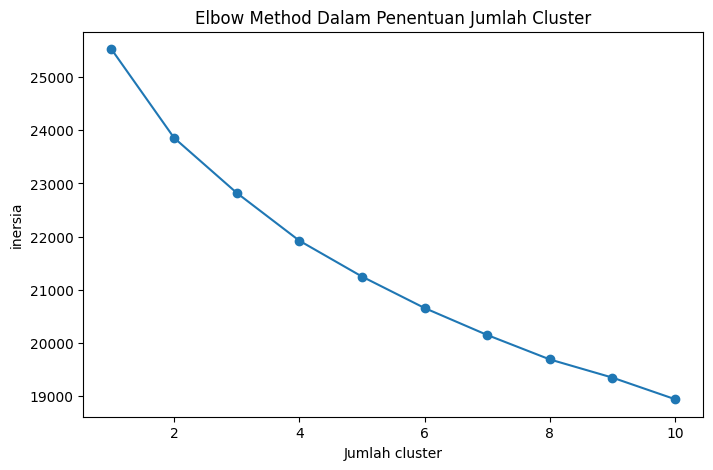

In [15]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Jumlah cluster')
plt.ylabel('inersia')
plt.title('Elbow Method Dalam Penentuan Jumlah Cluster')
plt.show()


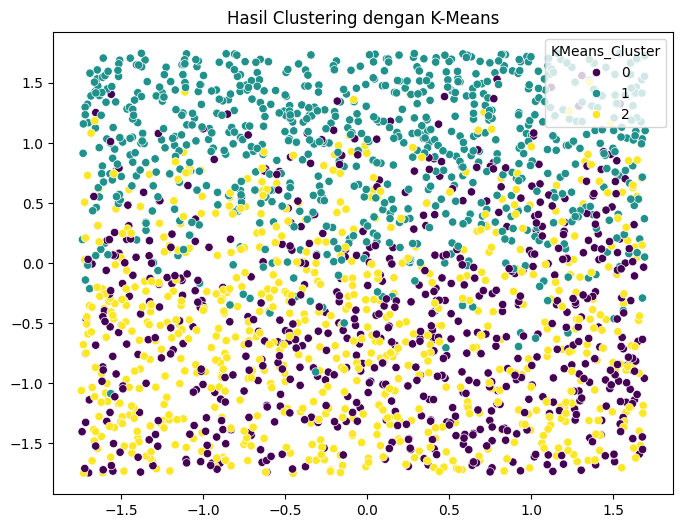

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('Hasil Clustering dengan K-Means')
plt.show()


***Agglomerative Clustering***

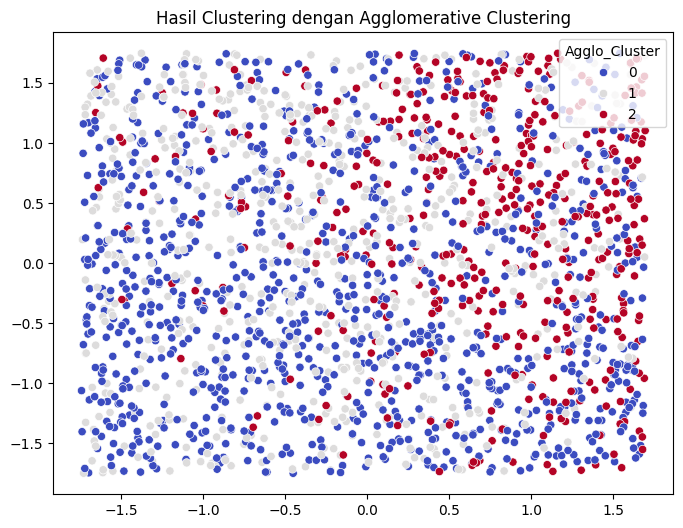

In [16]:
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df['Agglo_Cluster'], palette='coolwarm')
plt.title('Hasil Clustering dengan Agglomerative Clustering')
plt.show()

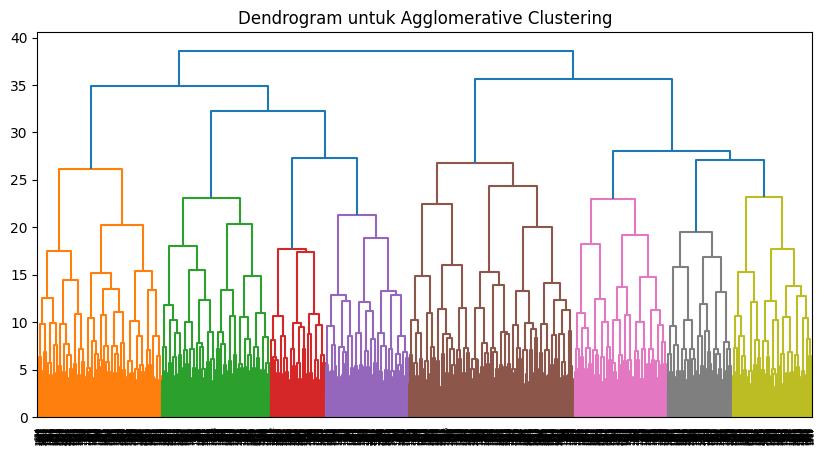

Analisis clustering selesai! Periksa visualisasi dan insight dari hasil yang diperoleh.


In [17]:
plt.figure(figsize=(10, 5))
Z = linkage(data_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram untuk Agglomerative Clustering')
plt.show()

print("Analisis clustering selesai! Periksa visualisasi dan insight dari hasil yang diperoleh.")


***PCA***

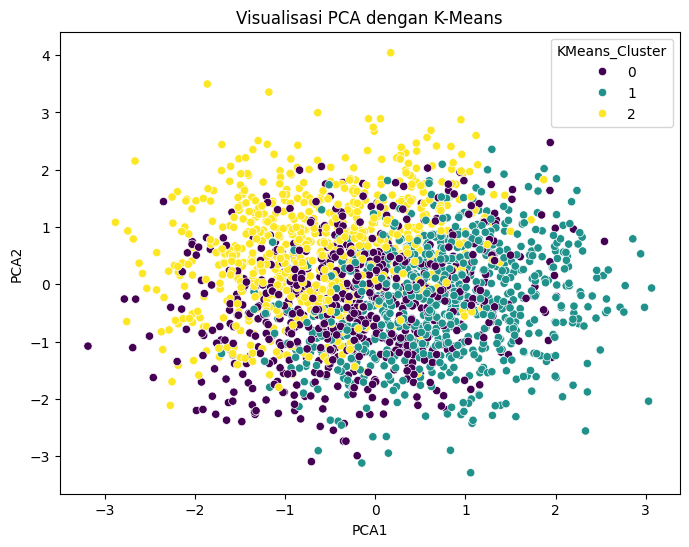

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('Visualisasi PCA dengan K-Means')
plt.show()

***t-SNE***

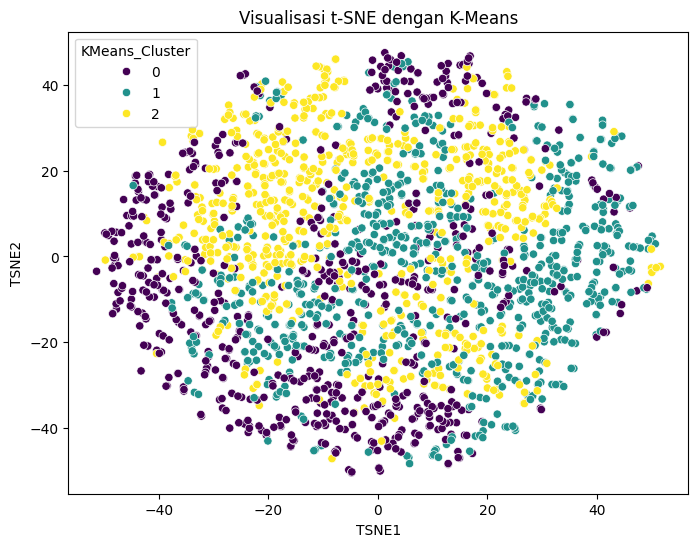

In [19]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(data_scaled)
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('Visualisasi t-SNE dengan K-Means')
plt.show()


**KESIMPULAN**
1. K-Means dan Agglomerative Clustering memberikan hasil yang sejalan, tetapi K-Means lebih cepat dalam implementasi, sementara Agglomerative memberikan lebih banyak informasi melalui dendrogram.

2. PCA membantu mengidentifikasi fitur dominan yang menentukan perbedaan antar kelompok, sedangkan t-SNE sangat berguna untuk melihat pola visual data.

3. Dataset memiliki pola kelompok yang cukup jelas, menunjukkan bahwa karakteristik performa kapal bisa diklasifikasikan ke dalam beberapa kategori, data ini bisa digunakan untuk memahami karakteristik utama kapal berdasarkan performanya, mengoptimalkan strategi operasional, atau bahkan menentukan pola pemeliharaan untuk meningkatkan efisiensi.
